## LAB2: Classificadores baseados em distâncias entre pontos

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: Duarte Gonçalves
## Número: 46484

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab2.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

## Considere o ficheiro pickle $\texttt{Lab2-data.p}$
### Neste ficheiro encontra-se um dicionário de Python com as seguintes variáveis:
### 1. "data":          dados bi-dimensionais (4000 amostras)
### 2. "target":       classe dos dados (inteiros de 0 a 3)
### 3. "foldTrain":  array boleano indicando os dados a serem usados para treinar os classificadores
### 3. "foldTest":   array boleano indicando os dados a serem usados para testar os classificadores


<hr style="border:2px solid black"> </hr>

# Pergunta 1 - Classificadores da distância ao centroide:
## 1. Use os dados de treino para estimar os centroides de cada classe. Imprima os valores obtidos para cada classe, indicando a classe em questão.
## 2. Com a métrica de distância euclideana, calcule a matriz de confusão e o número total de erros nos dados de teste.
## 3. Explique brevemente porque é que mais de metade dos pontos da classe "1" não são bem classificados 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix
D=pickle.load(open('Lab2-data.p','rb'))
print(D.keys())

dict_keys(['data', 'target', 'foldTrain', 'foldTest'])


Número das classes : [0 1 2 3]
Centroíde da classe 0:  [-0.13243819  0.03660923]
Centroíde da classe 1:  [-0.77640453  1.25665047]
Centroíde da classe 2:  [0.01068383 0.25081224]
Centroíde da classe 3:  [-0.0907223  -0.54198523]

Centroides Stacked:  [[-0.13243819  0.03660923]
 [-0.77640453  1.25665047]
 [ 0.01068383  0.25081224]
 [-0.0907223  -0.54198523]]


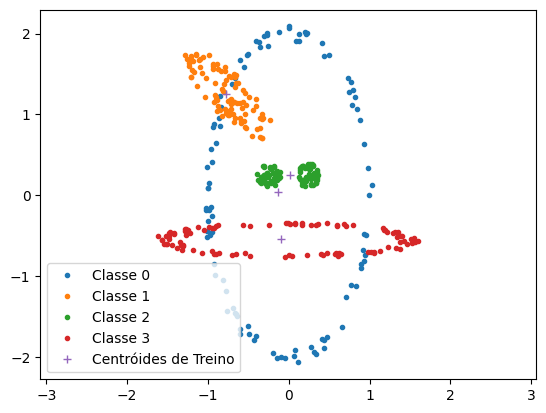

In [15]:
#1.1
#print(D.keys())
X = D['data']
y = D['target']
f1 = D['foldTrain']
f2 = D['foldTest']

#X1 e y1 -> dados de treino
#X2 e y2 -> dados de teste
X1 = X[:,f1]
X2 = X[:,f2]
y1 = y[f1]
y2 = y[f2]

print('Número das classes :', np.unique(y))

m0 = np.mean(X1[:,y1==0], axis=1)
print("Centroíde da classe 0: ",m0)
m1 = np.mean(X1[:,y1==1], axis=1)
print("Centroíde da classe 1: ",m1)
m2 = np.mean(X1[:,y1==2], axis=1)
print("Centroíde da classe 2: ",m2)
m3 = np.mean(X1[:,y1==3], axis=1)
print("Centroíde da classe 3: ",m3)
print()
medias_stack = np.vstack((m0,m1,m2,m3))
print("Centroides Stacked: ",medias_stack)

plt.plot(X1[0,y1==0], X1[1,y1==0], '.', label='Classe 0')
plt.plot(X1[0,y1==1], X1[1,y1==1], '.', label='Classe 1')
plt.plot(X1[0,y1==2], X1[1,y1==2], '.', label='Classe 2')
plt.plot(X1[0,y1==3], X1[1,y1==3], '.', label='Classe 3')
plt.plot(medias_stack[:,0], medias_stack[:,1], '+', label='Centróides de Treino')
plt.axis('equal')
plt.legend(loc='lower left')
plt.show()



In [16]:
#1.2
Xtmp0 = X2-m0[:,np.newaxis]
D0 = np.sqrt(np.sum(Xtmp0**2,axis=0))

Xtmp1 = X2-m1[:,np.newaxis]
D1   = np.sqrt(np.sum(Xtmp1**2,axis=0))

Xtmp2 = X2-m2[:,np.newaxis]
D2   = np.sqrt(np.sum(Xtmp2**2,axis=0))

Xtmp3 = X2-m3[:,np.newaxis]
D3   = np.sqrt(np.sum(Xtmp3**2,axis=0))

DEuclidiana = np.vstack((D0,D1,D2,D3))
y2e = np.argmin(DEuclidiana, axis=0)

print('Matriz de Confusão:\n', confusion_matrix(y2, y2e))
print('Número Total de Erros: ', np.sum(y2!=y2e))

Matriz de Confusão:
 [[ 49 283 151 417]
 [  0 376 524   0]
 [266   0 634   0]
 [  0   0   0 900]]
Número Total de Erros:  1641


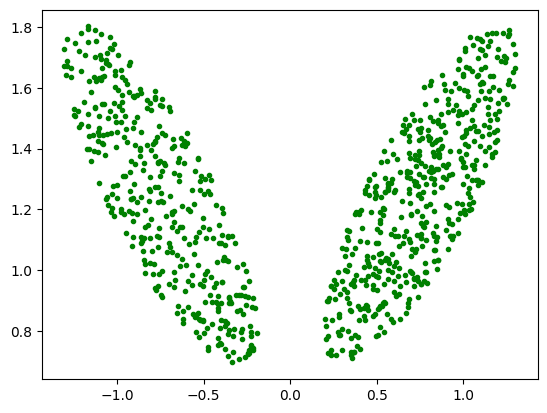

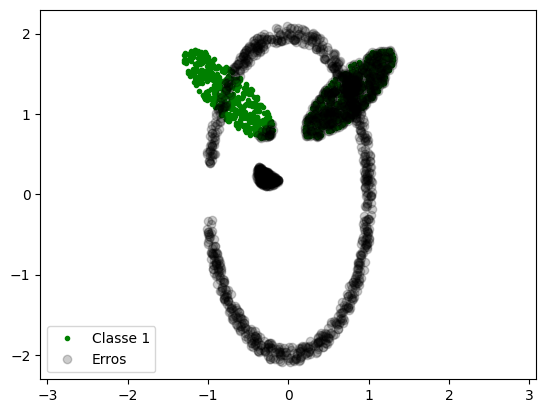

In [17]:
#1.3
plt.plot(X2[0,y2==1], X2[1,y2==1], '.g', label='Classe 1');plt.show()
plt.plot(X2[0,y2==1], X2[1,y2==1], '.g', label='Classe 1')
plt.plot(X2[0,y2!=y2e], X2[1,y2!=y2e], 'ok', alpha=0.2, label='Erros')
plt.axis('equal')
plt.legend(loc='lower left')
plt.show()

A classe 1 apresenta vários erros devido à métrica utilizada para o cálculo dos centróides. Isto deve-se ao facto de que os suspostos resultados que deveriam ser pertencentes à classe 1, vão ser classificados como outra classe porque acabam por ser valores mais próximos da mesma.  

# Pergunta 2 - Classificadores dos k-vizinhos mais próximos:
## (Use os dados de treino nestes classificadores)
## 1. Para k=1, calcule a matriz de confusão e o número total de erros nos dados de teste. 
## 2. Faça um plot dos dados de teste por classe e dos erros cometidos por este classificador.
## 3. Repita as duas alíneas anteriores para k=5

In [18]:
#2.1
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=1).fit(X1.T,y1) #.fit() os dados para classificação
y2e=knn.predict(X2.T) 

print('Classificação Por Vizinhança k=1')
print('Matriz de Confusão:\n', confusion_matrix(y2, y2e))
print('Número Total de Erros: ', np.sum(y2!=y2e))

Classificação Por Vizinhança k=1
Matriz de Confusão:
 [[837  35   0  28]
 [469 402  29   0]
 [  0   0 900   0]
 [ 40   0   0 860]]
Número Total de Erros:  601


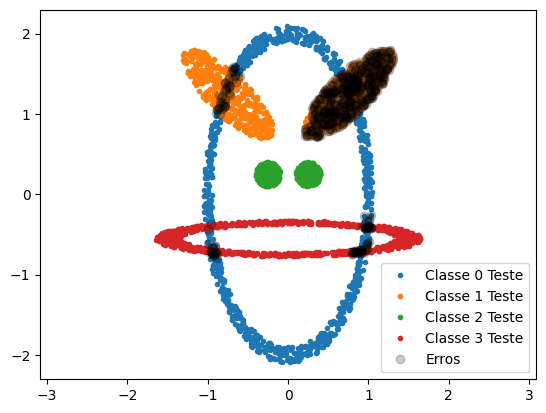

In [19]:
#2.2
plt.plot(X2[0,y2==0], X2[1,y2==0], '.', label='Classe 0 Teste')
plt.plot(X2[0,y2==1], X2[1,y2==1], '.', label='Classe 1 Teste')
plt.plot(X2[0,y2==2], X2[1,y2==2], '.', label='Classe 2 Teste')
plt.plot(X2[0,y2==3], X2[1,y2==3], '.', label='Classe 3 Teste')
plt.plot(X2[0,y2!=y2e], X2[1,y2!=y2e], 'ok', alpha=0.2, label='Erros')
plt.axis('equal')
plt.legend(loc='lower right')
plt.show()

Classificação Por Vizinhança k=5
Matriz de Confusão:
 [[784  50   0  66]
 [459 400  41   0]
 [  0   0 900   0]
 [ 23   0   0 877]]
Número Total de Erros:  639


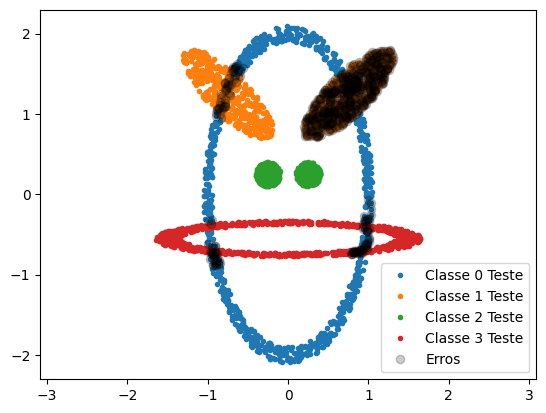

In [20]:
#2.3
knn=KNeighborsClassifier(n_neighbors=5).fit(X1.T,y1) 
y2e=knn.predict(X2.T) 
print('Classificação Por Vizinhança k=5')
print('Matriz de Confusão:\n', confusion_matrix(y2, y2e))
print('Número Total de Erros: ', np.sum(y2!=y2e))
plt.plot(X2[0,y2==0], X2[1,y2==0], '.', label='Classe 0 Teste')
plt.plot(X2[0,y2==1], X2[1,y2==1], '.', label='Classe 1 Teste')
plt.plot(X2[0,y2==2], X2[1,y2==2], '.', label='Classe 2 Teste')
plt.plot(X2[0,y2==3], X2[1,y2==3], '.', label='Classe 3 Teste')
plt.plot(X2[0,y2!=y2e], X2[1,y2!=y2e], 'ok', alpha=0.2, label='Erros')
plt.axis('equal')
plt.legend(loc='lower right')
plt.show()

# Pergunta 3 - Matrizes de distância:
## Considere os dados "digits" do sklearn ()
## 1. Ordene os dados por classe, calcule e visualize a matriz de distâncias para o conjunto de dados, usando a distância euclideana
## 2. Repita a alínea anterior para a distância de cosseno

In [21]:
import sklearn.datasets as dt
import scipy.spatial.distance as spd
D=dt.load_digits()
X=D.data
y=D.target

(-0.5, 1796.5, 1796.5, -0.5)

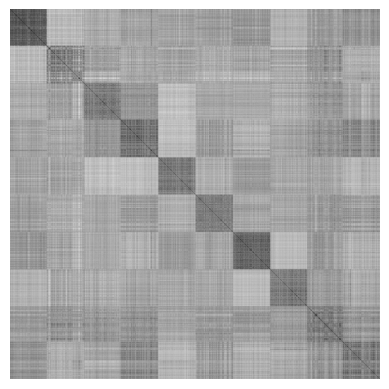

In [22]:
#3.1
ord = np.argsort(y)
X = X[ord,:]
y = y[ord]
DEuc = spd.squareform(spd.pdist(X,'euclidean'))

plt.imshow(DEuc,cmap='gray')
plt.axis('off')

(-0.5, 1796.5, 1796.5, -0.5)

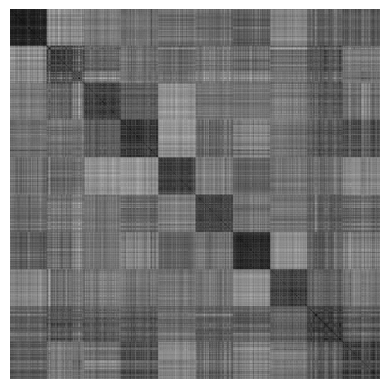

In [23]:
DCos = spd.squareform(spd.pdist(X,'cosine'))
plt.imshow(DCos,cmap='gray')
plt.axis('off')